In [1]:
pwd

'P:\\Projects\\dalx\\notebooks'

In [2]:
cd ..

P:\Projects\dalx


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
muddy_results = pd.read_csv('data/output/muddy/muddy_exp.csv', index_col='Muddy')

In [5]:
muddy_results

,CV_1,CV_2,CV_3,CV_4,CV_5,CV_6,STD,MEAN
Muddy,,,,,,,,
0,0.7619,0.7819,0.7850,0.7787,0.7545,0.7703,0.012025,0.772050
1,0.7313,0.7734,0.7798,0.7587,0.7745,0.7566,0.017803,0.762383
2,0.7450,0.7566,0.7555,0.7450,0.7408,0.7408,0.007054,0.747283
3,0.7513,0.7566,0.7661,0.7429,0.7387,0.7397,0.010816,0.749217
4,0.7387,0.7397,0.7640,0.7513,0.7460,0.7387,0.009974,0.746400
5,0.7482,0.7387,0.7418,0.7566,0.7418,0.7260,0.010182,0.742183
6,0.7418,0.7260,0.7471,0.7619,0.7492,0.7292,0.013357,0.742533
7,0.7640,0.7176,0.7513,0.7471,0.7397,0.7281,0.016658,0.741300
8,0.7566,0.7229,0.7576,0.7629,0.7292,0.7418,0.016504,0.745167


In [26]:
data = muddy_results[[f'CV_{i}' for i in range(1,7)]].values.transpose() * 100

In [41]:
data

array([[76.19, 73.13, 74.5 , 75.13, 73.87, 74.82, 74.18, 76.4 , 75.66,
        74.39, 74.71],
       [78.19, 77.34, 75.66, 75.66, 73.97, 73.87, 72.6 , 71.76, 72.29,
        72.08, 75.76],
       [78.5 , 77.98, 75.55, 76.61, 76.4 , 74.18, 74.71, 75.13, 75.76,
        75.55, 75.34],
       [77.87, 75.87, 74.5 , 74.29, 75.13, 75.66, 76.19, 74.71, 76.29,
        75.34, 76.29],
       [75.45, 77.45, 74.08, 73.87, 74.6 , 74.18, 74.92, 73.97, 72.92,
        73.66, 75.03],
       [77.03, 75.66, 74.08, 73.97, 73.87, 72.6 , 72.92, 72.81, 74.18,
        73.02, 74.29]])

In [68]:
gold = np.array([77.21] * 13)
generic = np.array([75.92] * 13)
nolx = np.array([74.73] * 13)

In [50]:
len(gold)

13

Text(0, 0.5, 'Model AUC on test set')

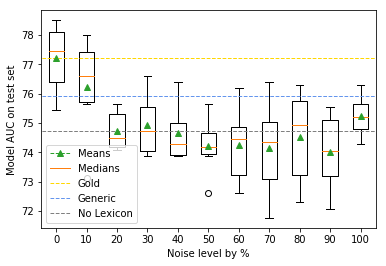

In [82]:
fig, ax = plt.subplots()
box = ax.boxplot(
    data, showmeans=True,
    labels=[f'{x*10}' for x in range(11)],
)

l1 = ax.plot(gold, '--', linewidth=1, color='gold', label='Gold')
l2 = ax.plot(generic, '--', linewidth=1, color='cornflowerblue', label='Generic')
l3 = ax.plot(nolx, '--', linewidth=1, color='grey', label='No Lexicon')


ax.legend([box['means'][0], box['medians'][0], l1[0], l2[0], l3[0]], 
          ['Means', 'Medians', 'Gold', 'Generic', 'No Lexicon'],
          #loc='upper right'
         )
ax.set_xlabel('Noise level by %')
ax.set_ylabel('Model AUC on test set')

In [59]:
l1